## Mini Project III

In [1]:
import pandas as pd
import numpy as np
# import visualize
import matplotlib.pyplot as plt
import seaborn as sns
# import Kmeans from sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# import DBSCAN
from sklearn.cluster import DBSCAN
# Aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
# Cluster hierarchy
import scipy.cluster.hierarchy as sch
from scipy import stats

### Do they have savings account? How much do they save?

In [2]:
customer = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\customer.csv")

In [ ]:
customer.groupby(['age']).mean()
print(customer.groupby(['age']).mean().to_markdown())

In [28]:
customer_age = customer[['cust_id','age']]

In [ ]:
customer_age['age_bin'] = pd.cut(x = customer_age['age'], bins = [13, 20, 40, 60, 90])

In [60]:
customer_age

,cust_id,age,age_bin
0,1362691,46,"(40, 60]"
1,1362487,71,"(60, 90]"
2,1363160,38,"(20, 40]"
3,1362752,54,"(40, 60]"
4,1362548,59,"(40, 60]"
...,...,...,...
742,1363324,36,"(20, 40]"
743,1362895,56,"(40, 60]"
744,1362569,50,"(40, 60]"
745,1363364,37,"(20, 40]"


In [117]:
# get age_bin dummy
age_data = pd.get_dummies(customer_age, columns = ['age_bin']).drop(columns = ['cust_id'])
# concatenate with the previous dataframe
customer_age_data = pd.concat([customer_age,age_data], ignore_index=False, axis = 1).drop(columns = ['age'])

In [118]:
customer_age_data

,cust_id,age_bin,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,1362691,"(40, 60]",0,0,1,0
1,1362487,"(60, 90]",0,0,0,1
2,1363160,"(20, 40]",0,1,0,0
3,1362752,"(40, 60]",0,0,1,0
4,1362548,"(40, 60]",0,0,1,0
...,...,...,...,...,...,...
742,1363324,"(20, 40]",0,1,0,0
743,1362895,"(40, 60]",0,0,1,0
744,1362569,"(40, 60]",0,0,1,0
745,1363364,"(20, 40]",0,1,0,0


In [3]:
saving_accounts = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\saving_accounts.csv").drop(columns = ['acct_start_date','acct_end_date'])
saving_transactions = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\saving_transactions.csv")

In [4]:
saving_accounts['saving_amt'] = saving_accounts['ending_balance'] - saving_accounts['starting_balance']

In [5]:
saving_accounts

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,starting_balance,ending_balance,saving_amt
0,1363160,13631603,100,BS,Y,113.04,122.54,9.50
1,1362487,13624873,500,MM,N,651.73,12.89,-638.84
2,1362548,13625483,100,BS,Y,250.24,254.02,3.78
3,1362752,13627523,100,BS,Y,600.26,609.33,9.07
4,1363017,13630173,100,BS,N,2011.02,2901.35,890.33
...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,177.33,528.57,351.24
417,1363038,13630383,100,BS,Y,333.53,508.26,174.73
418,1362529,13625293,100,BS,Y,662.06,873.14,211.08
419,1362895,13628953,100,BS,Y,169.96,96.25,-73.71


In [6]:
saving_accounts['account_active'] = saving_accounts['account_active'].replace({'Y':1,'N':0})

In [119]:
customer_saving = pd.merge(saving_accounts, customer_age_data, how = 'inner')

In [120]:
customer_saving

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,starting_balance,ending_balance,saving_amt,age_bin,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,1363160,13631603,100,BS,1,113.04,122.54,9.50,"(20, 40]",0,1,0,0
1,1362487,13624873,500,MM,0,651.73,12.89,-638.84,"(60, 90]",0,0,0,1
2,1362548,13625483,100,BS,1,250.24,254.02,3.78,"(40, 60]",0,0,1,0
3,1362752,13627523,100,BS,1,600.26,609.33,9.07,"(40, 60]",0,0,1,0
4,1363017,13630173,100,BS,0,2011.02,2901.35,890.33,"(13, 20]",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,1,177.33,528.57,351.24,"(40, 60]",0,0,1,0
417,1363038,13630383,100,BS,1,333.53,508.26,174.73,"(20, 40]",0,1,0,0
418,1362529,13625293,100,BS,1,662.06,873.14,211.08,"(40, 60]",0,0,1,0
419,1362895,13628953,100,BS,1,169.96,96.25,-73.71,"(40, 60]",0,0,1,0


In [122]:
cluster_data = customer_saving[['acct_type','age_bin','minimum_balance', 'starting_balance', 'ending_balance', 'saving_amt','account_active','age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]','age_bin_(60, 90]' ]]

In [123]:
cluster_data

,acct_type,age_bin,minimum_balance,starting_balance,ending_balance,saving_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,BS,"(20, 40]",100,113.04,122.54,9.50,1,0,1,0,0
1,MM,"(60, 90]",500,651.73,12.89,-638.84,0,0,0,0,1
2,BS,"(40, 60]",100,250.24,254.02,3.78,1,0,0,1,0
3,BS,"(40, 60]",100,600.26,609.33,9.07,1,0,0,1,0
4,BS,"(13, 20]",100,2011.02,2901.35,890.33,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
416,BS,"(40, 60]",100,177.33,528.57,351.24,1,0,0,1,0
417,BS,"(20, 40]",100,333.53,508.26,174.73,1,0,1,0,0
418,BS,"(40, 60]",100,662.06,873.14,211.08,1,0,0,1,0
419,BS,"(40, 60]",100,169.96,96.25,-73.71,1,0,0,1,0


In [127]:
# scale data
cluster_data.dropna(inplace = True)
cols = ['minimum_balance', 'starting_balance', 'ending_balance', 'saving_amt', 'account_active', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']
cols_scaled = ['minimum_balance_scaled', 'starting_balance_scaled', 'ending_balance_scaled','saving_amt_scaled','account_active_scaled', 'age_bin_(13, 20]_scaled', 'age_bin_(20, 40]_scaled', 'age_bin_(40, 60]_scaled', 'age_bin_(60, 90]_scaled']
scaler = StandardScaler()
cluster_data[cols_scaled] = scaler.fit_transform(cluster_data[cols])
cluster_data.head()

C:\Users\quang\AppData\Local\Temp\ipykernel_14280\1400665845.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\quang\AppData\Local\Temp\ipykernel_14280\1400665845.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,acct_type,age_bin,minimum_balance,starting_balance,ending_balance,saving_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]",minimum_balance_scaled,starting_balance_scaled,ending_balance_scaled,saving_amt_scaled,account_active_scaled,"age_bin_(13, 20]_scaled","age_bin_(20, 40]_scaled","age_bin_(40, 60]_scaled","age_bin_(60, 90]_scaled"
0,BS,"(20, 40]",100,113.04,122.54,9.50,1,0,1,0,0,-0.560449,-0.451386,-0.552681,-0.342853,0.355491,-0.5,1.641248,-0.723991,-0.477017
1,MM,"(60, 90]",500,651.73,12.89,-638.84,0,0,0,0,1,1.784285,-0.138513,-0.605491,-0.943038,-2.813013,-0.5,-0.609293,-0.723991,2.096363
2,BS,"(40, 60]",100,250.24,254.02,3.78,1,0,0,1,0,-0.560449,-0.371700,-0.489357,-0.348148,0.355491,-0.5,-0.609293,1.381232,-0.477017
3,BS,"(40, 60]",100,600.26,609.33,9.07,1,0,0,1,0,-0.560449,-0.168407,-0.318231,-0.343251,0.355491,-0.5,-0.609293,1.381232,-0.477017
4,BS,"(13, 20]",100,2011.02,2901.35,890.33,0,1,0,0,0,-0.560449,0.650968,0.785661,0.472554,-2.813013,2.0,-0.609293,-0.723991,-0.477017


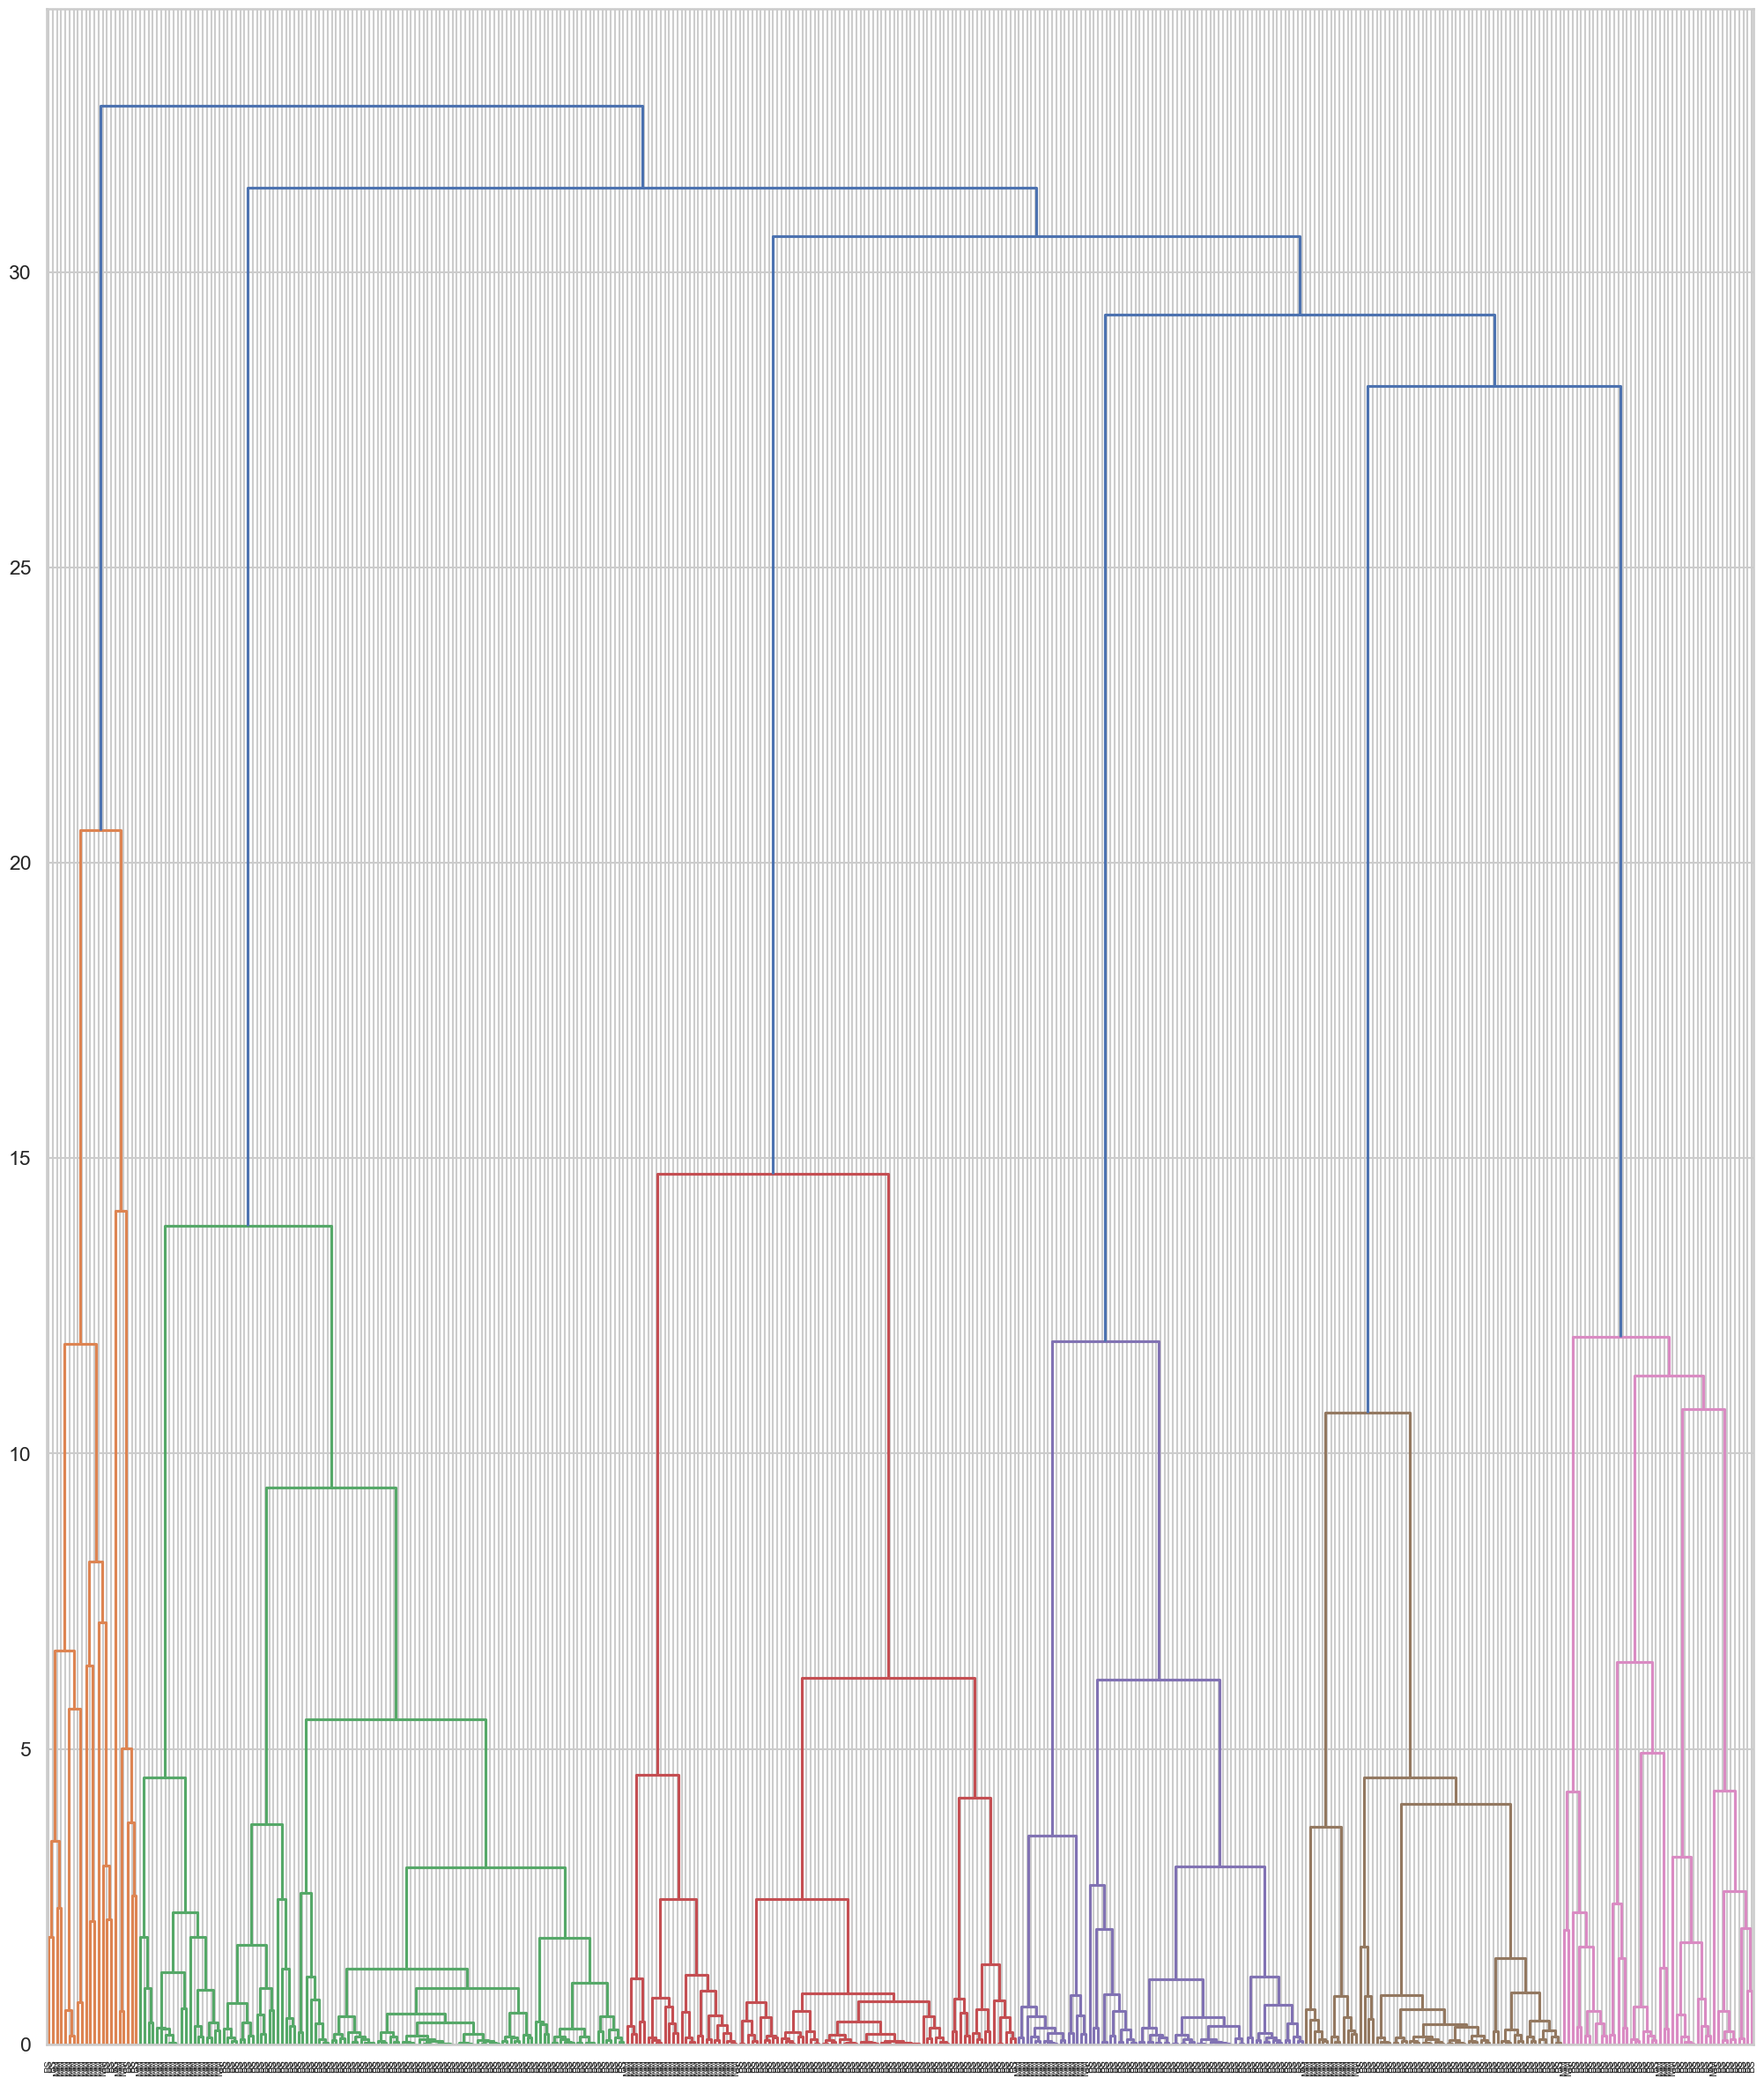

In [129]:
linkage_type = 'ward'
cluster_new = cluster_data.iloc[:, 11:]
linkage_matrix = linkage(cluster_new, linkage_type)

plt.figure(figsize=(25,30))
labels = list(cluster_data['acct_type'])

# plot using 'dendrogram()'
dendrogram(linkage_matrix, labels=labels,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.)

plt.show()

In [139]:
#Run Clustering
model = AgglomerativeClustering(n_clusters = 3)
model.fit(cluster_new)

AgglomerativeClustering(n_clusters=3)

In [219]:
#Adding cluster column from output of model
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
cluster_new = cluster_data.iloc[:, 11:]

clustering_model.fit(cluster_new)
label = clustering_model.labels_
print(label)

cluster_data['cluster'] = label
cluster_data.dropna(inplace = True)
cluster_data.head()

[0 1 2 2 1 1 2 2 1 1 2 1 2 1 0 1 1 1 2 0 0 2 2 0 0 2 2 1 1 2 1 0 0 1 1 2 0
 0 1 1 1 0 1 2 0 1 2 1 2 2 0 2 2 0 2 1 1 1 1 0 2 1 2 1 0 1 0 0 1 1 1 1 0 0
 0 1 0 2 0 1 1 1 1 1 1 2 2 1 0 0 0 1 1 2 1 2 0 0 0 1 1 0 1 1 0 2 0 1 1 2 1
 1 1 1 1 1 2 0 1 0 1 0 2 0 0 1 2 0 2 2 1 2 2 1 0 0 1 1 1 2 0 1 0 2 1 1 1 2
 1 2 1 0 1 1 2 2 2 1 0 0 2 1 2 2 1 2 1 1 0 0 1 0 2 2 2 1 2 0 0 0 1 2 0 2 0
 1 1 2 0 2 2 2 0 1 1 2 1 1 1 2 0 1 1 0 2 0 0 0 1 2 0 2 2 1 1 0 2 2 2 1 2 1
 1 2 2 0 1 2 1 1 1 2 2 1 1 2 1 2 1 0 1 1 0 0 0 1 2 1 1 0 0 1 2 0 1 1 1 2 1
 0 1 1 2 0 0 0 1 2 0 2 0 1 1 1 2 2 2 1 2 1 2 0 1 2 1 1 1 0 1 1 1 1 0 2 2 0
 2 0 1 0 1 0 1 1 0 2 2 2 1 1 1 0 1 0 1 1 1 1 1 0 2 2 2 1 2 1 2 2 2 1 1 2 1
 2 1 1 2 0 1 0 0 1 1 0 2 2 2 1 1 2 1 0 2 2 1 0 1 0 0 0 0 1 1 0 1 0 0 0 2 2
 1 1 0 1 0 1 0 2 1 0 1 1 1 0 0 1 1 2 1 2 2 0 1 0 1 0 0 0 0 1 1 1 1 0 1 2 0
 2 2 0]


C:\Users\quang\AppData\Local\Temp\ipykernel_14280\1014378637.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\quang\AppData\Local\Temp\ipykernel_14280\1014378637.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,acct_type,age_bin,minimum_balance,starting_balance,ending_balance,saving_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]",...,minimum_balance_scaled,starting_balance_scaled,ending_balance_scaled,saving_amt_scaled,account_active_scaled,"age_bin_(13, 20]_scaled","age_bin_(20, 40]_scaled","age_bin_(40, 60]_scaled","age_bin_(60, 90]_scaled",cluster
0,BS,"(20, 40]",100,113.04,122.54,9.50,1,0,1,0,...,-0.560449,-0.451386,-0.552681,-0.342853,0.355491,-0.5,1.641248,-0.723991,-0.477017,0
1,MM,"(60, 90]",500,651.73,12.89,-638.84,0,0,0,0,...,1.784285,-0.138513,-0.605491,-0.943038,-2.813013,-0.5,-0.609293,-0.723991,2.096363,1
2,BS,"(40, 60]",100,250.24,254.02,3.78,1,0,0,1,...,-0.560449,-0.371700,-0.489357,-0.348148,0.355491,-0.5,-0.609293,1.381232,-0.477017,2
3,BS,"(40, 60]",100,600.26,609.33,9.07,1,0,0,1,...,-0.560449,-0.168407,-0.318231,-0.343251,0.355491,-0.5,-0.609293,1.381232,-0.477017,2
4,BS,"(13, 20]",100,2011.02,2901.35,890.33,0,1,0,0,...,-0.560449,0.650968,0.785661,0.472554,-2.813013,2.0,-0.609293,-0.723991,-0.477017,1


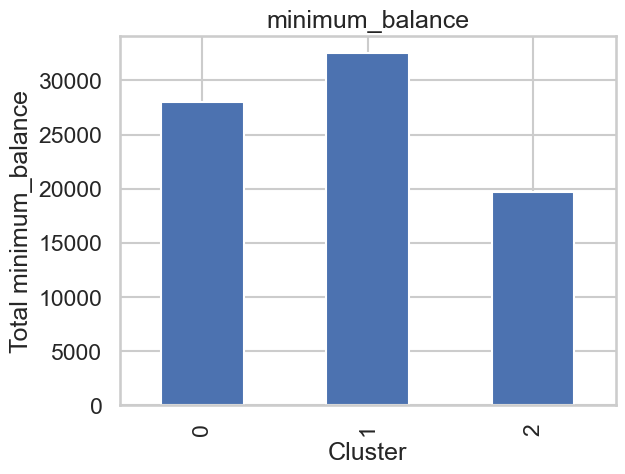

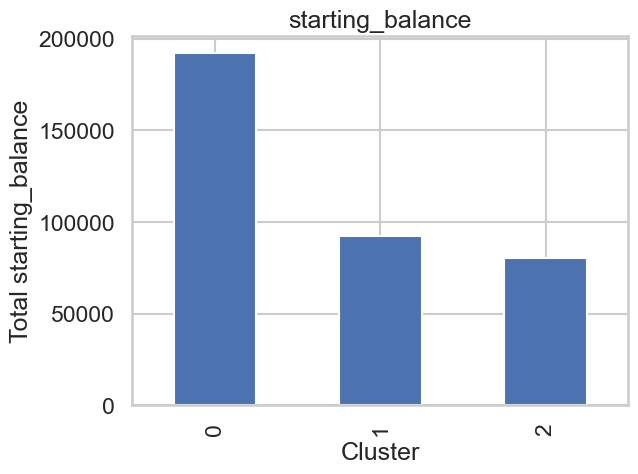

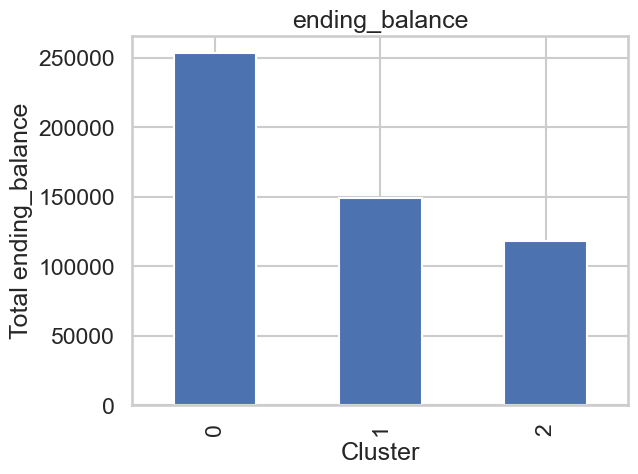

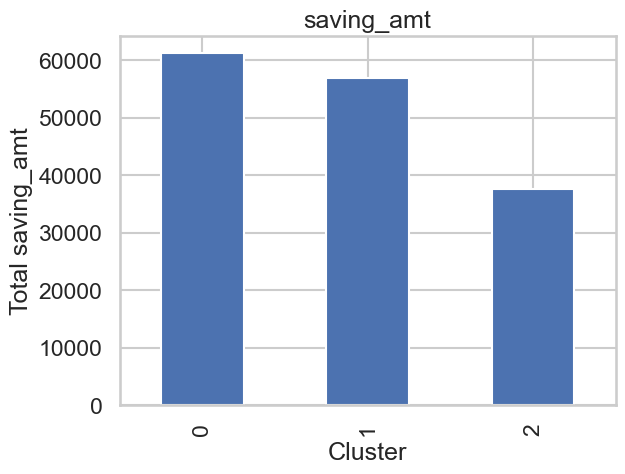

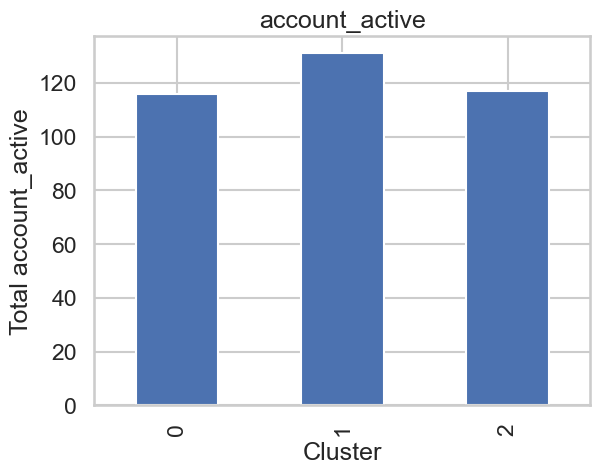

In [218]:
# Visualize the results by total
features = list(cluster_data.columns)[2:7]
for x in features:
  plt.figure()
  cluster_data.groupby(["cluster"])[x].sum().plot(kind="bar", ylabel='Total ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

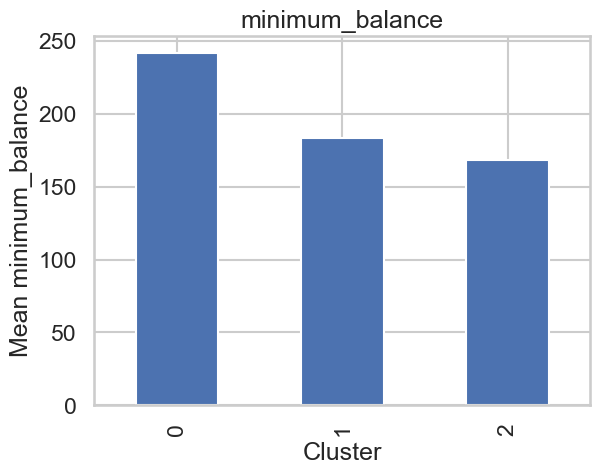

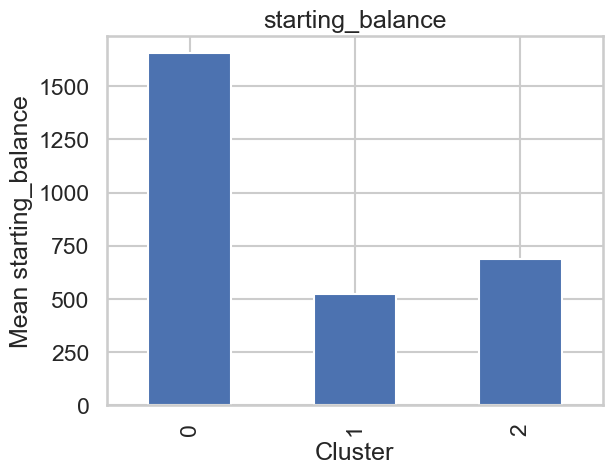

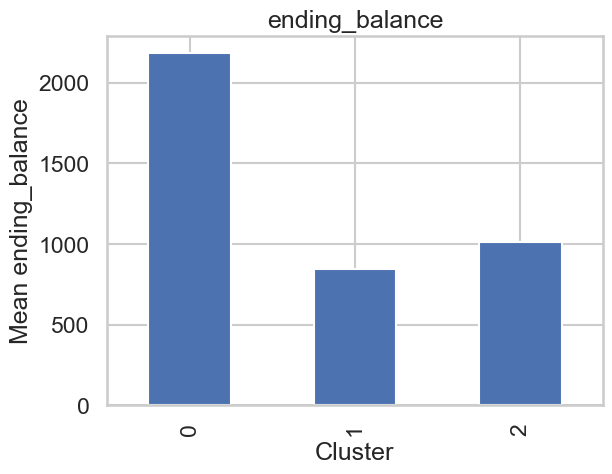

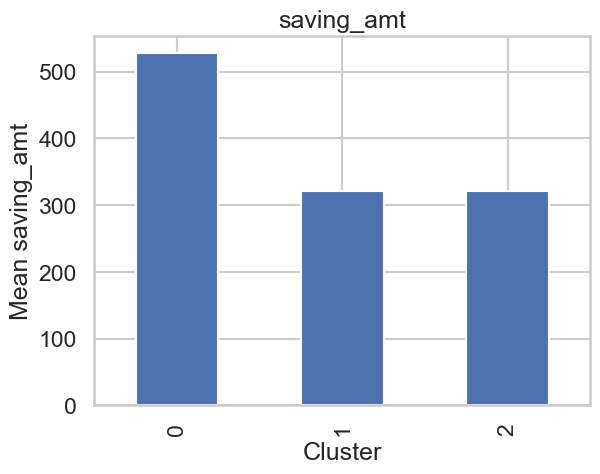

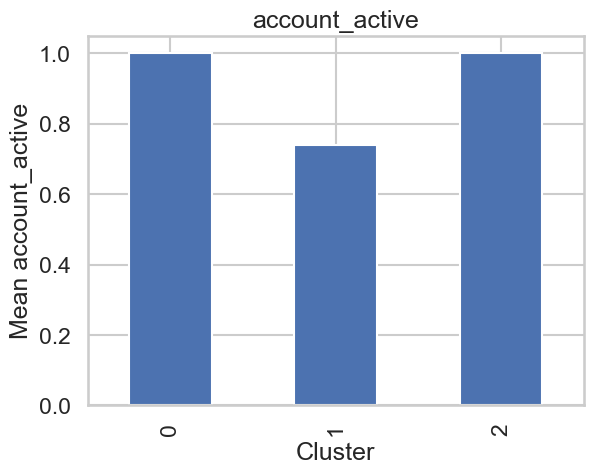

In [220]:
# Visualize the results by mean
features = list(cluster_data.columns)[2:7]
for x in features:
  plt.figure()
  cluster_data.groupby(["cluster"])[x].mean().plot(kind="bar", ylabel='Mean ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

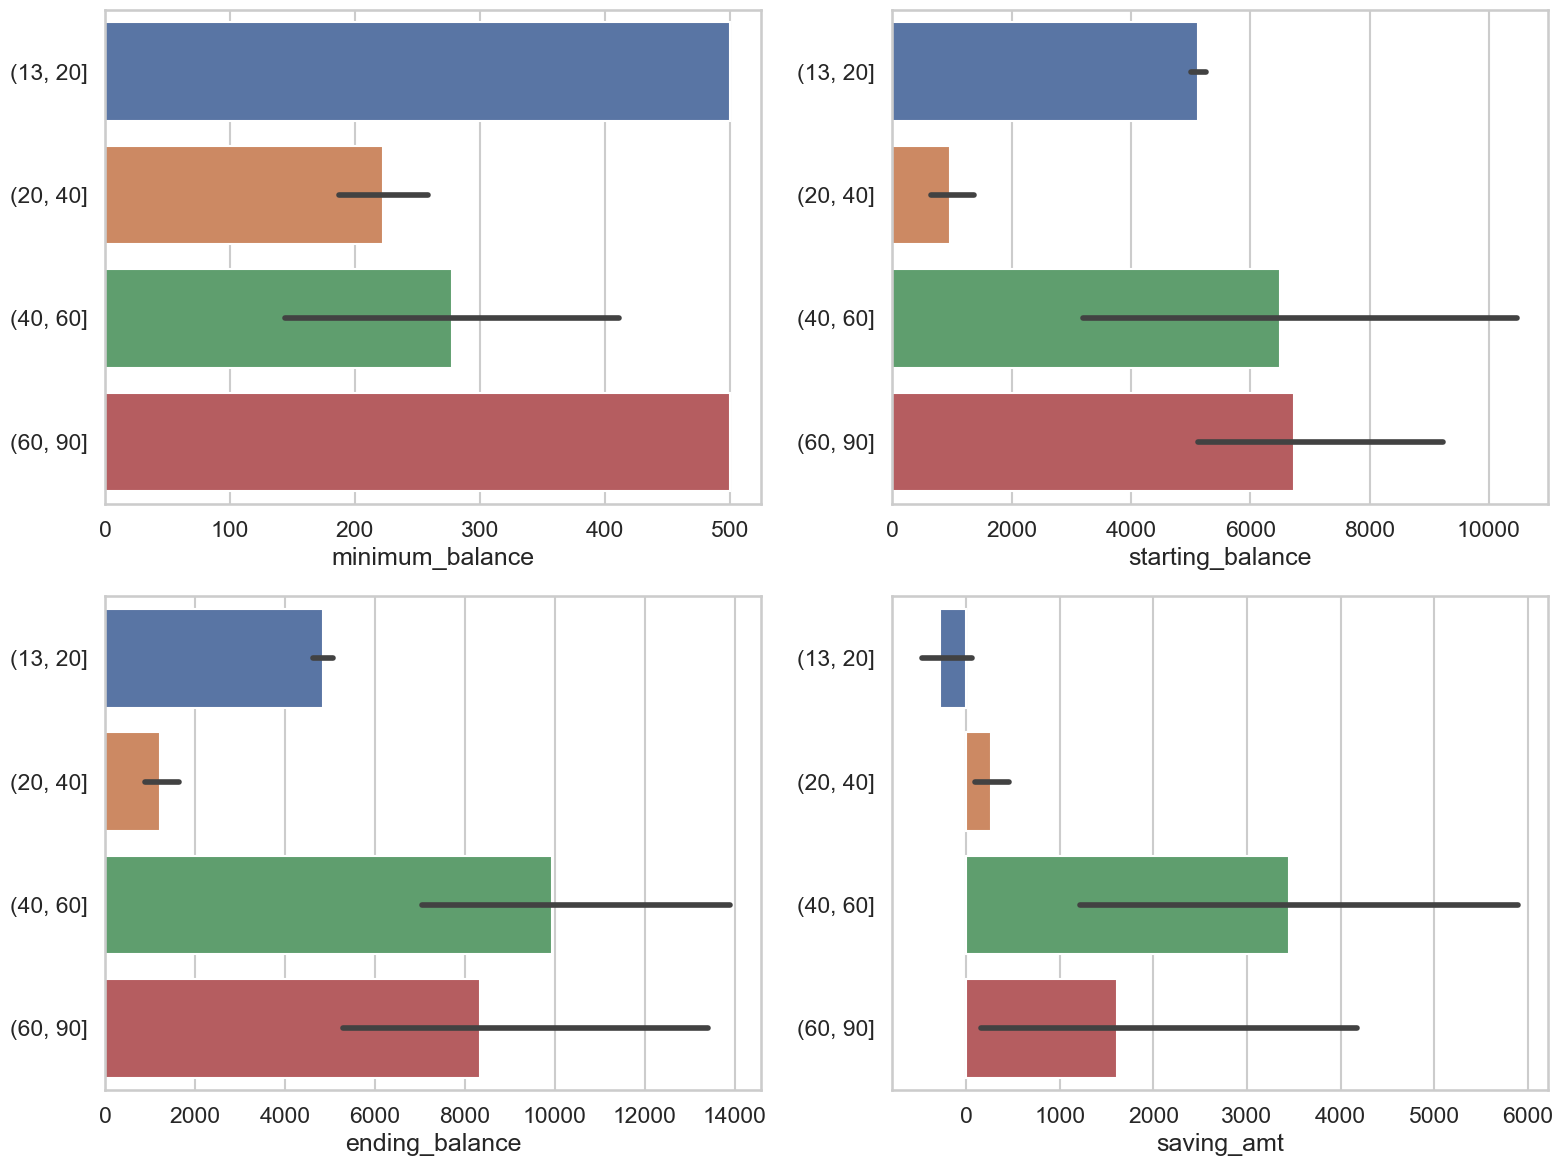

In [222]:
# Cluster 0
cluster0 = cluster_data[cluster_data['cluster'] == 0.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster_1 = cluster0.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_1, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

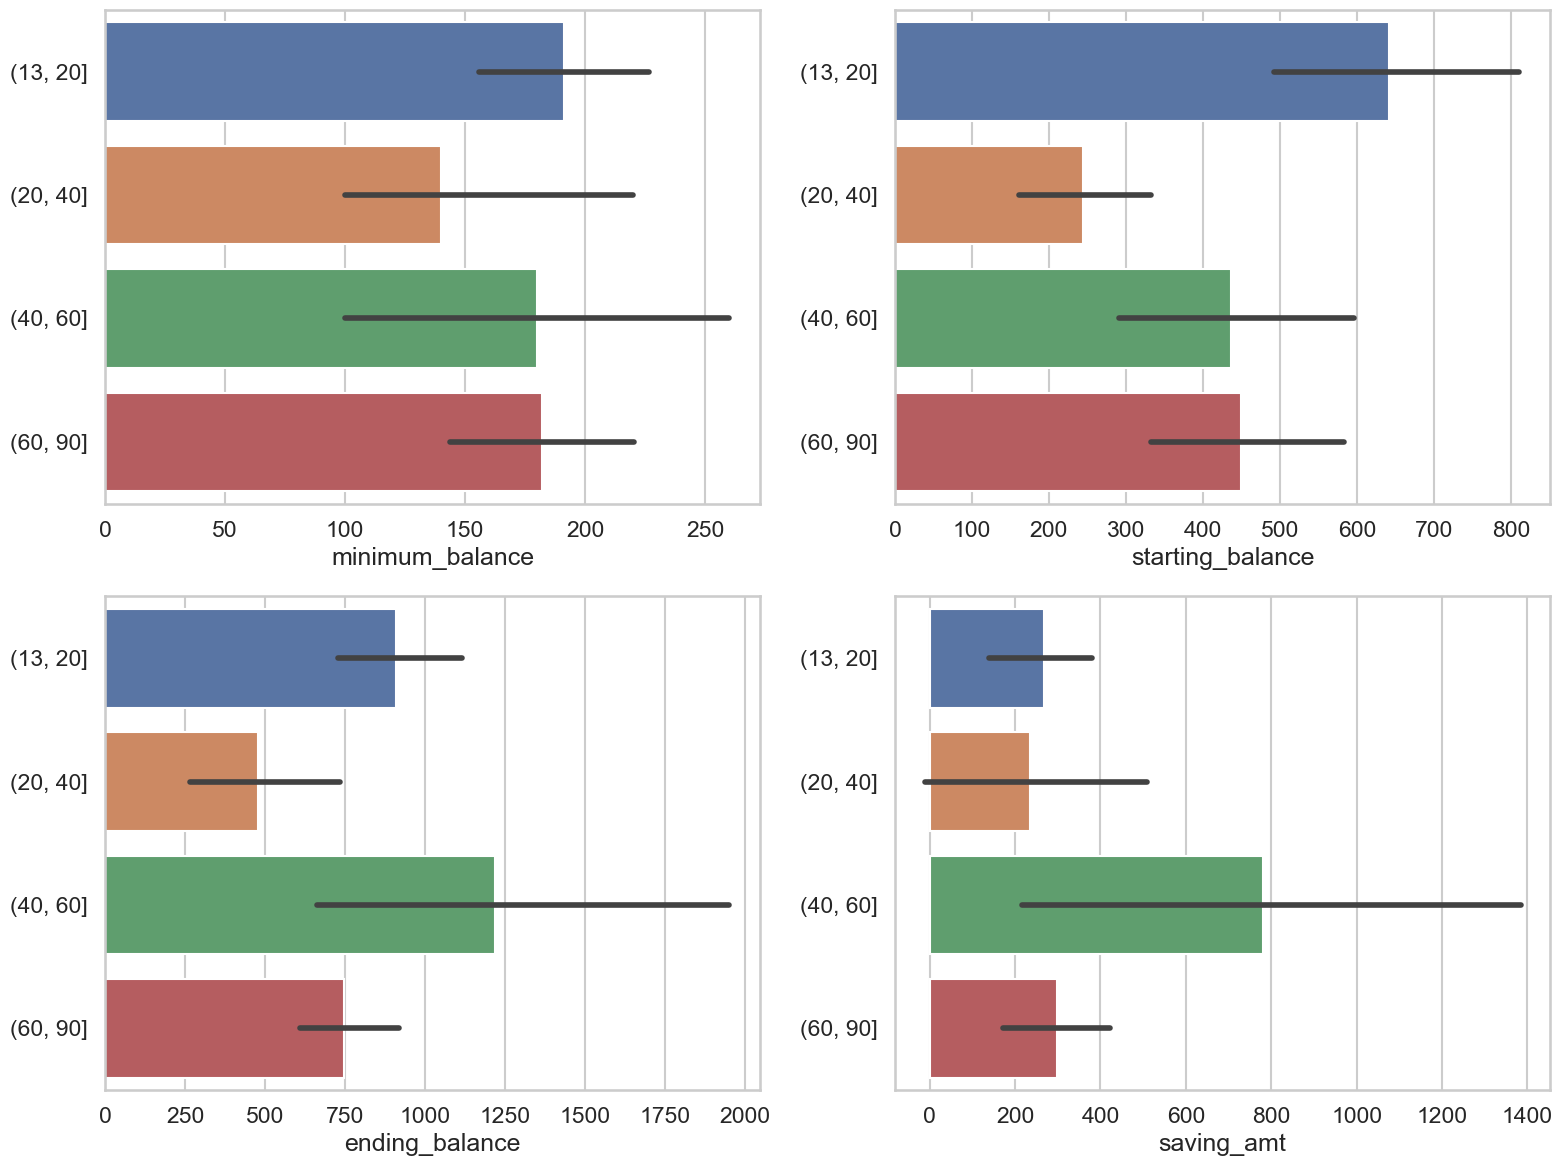

In [223]:
# Cluster 1
cluster1 = cluster_data[cluster_data['cluster'] == 1.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster_2 = cluster1.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_2, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

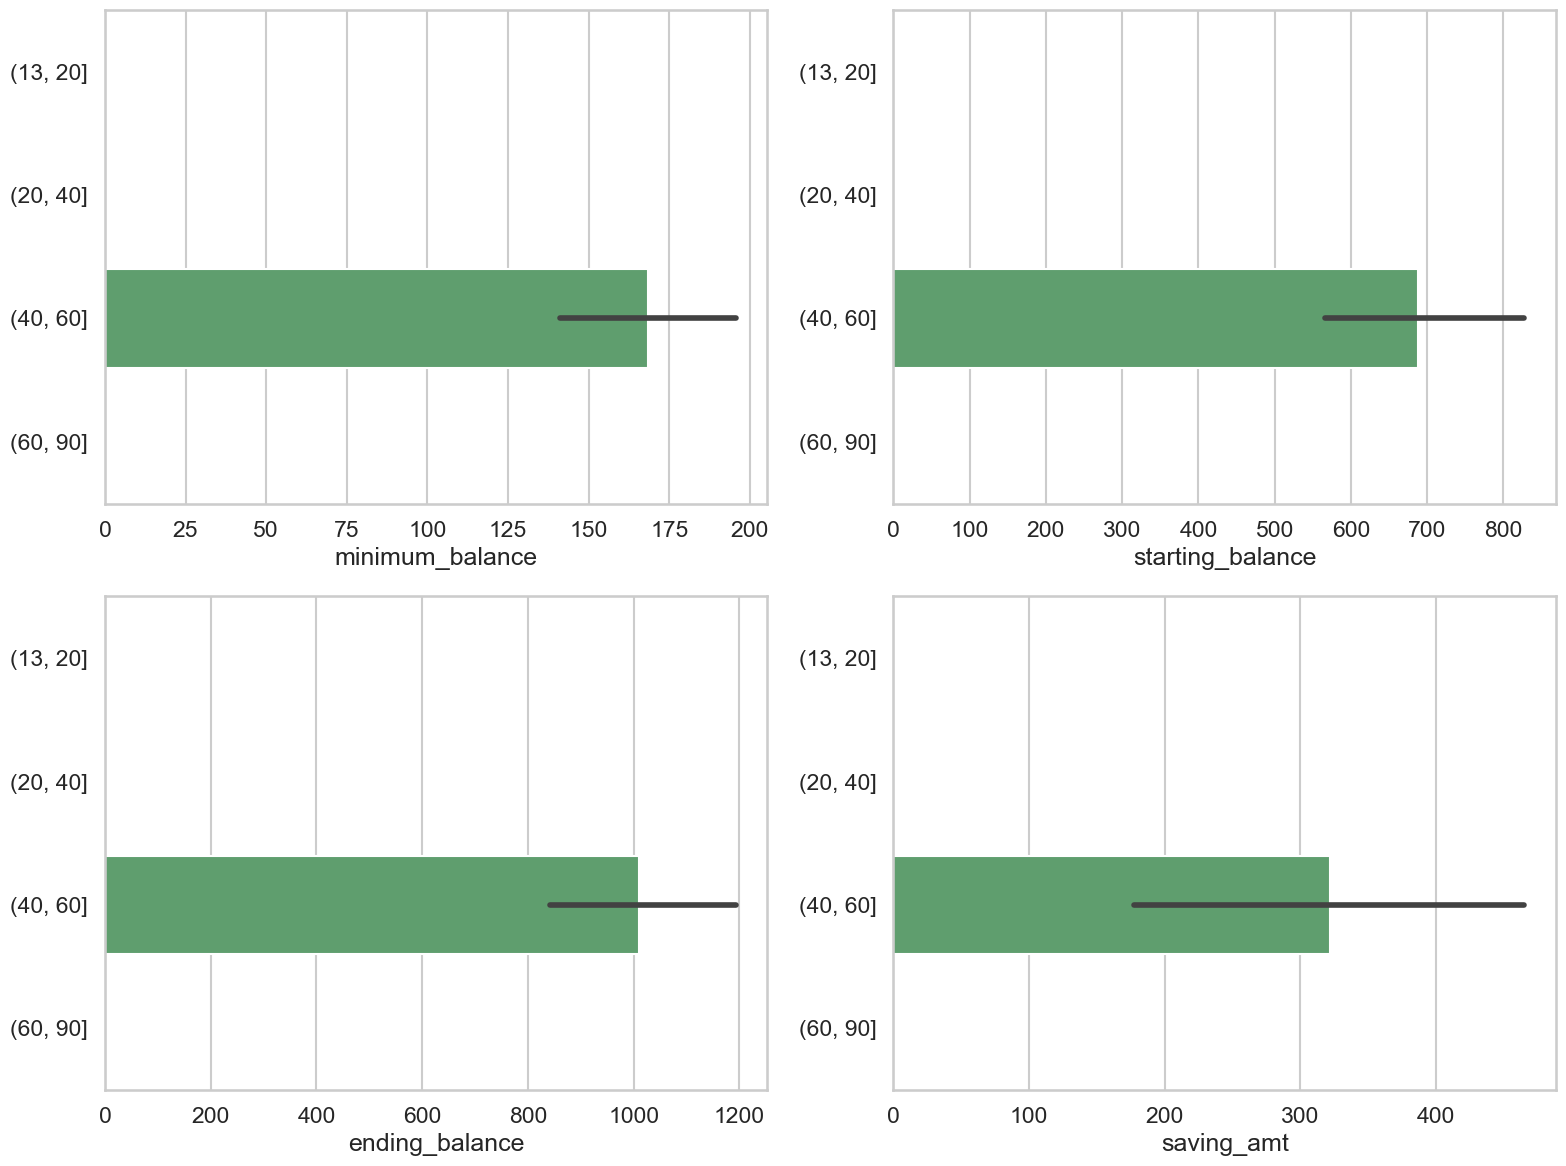

In [224]:
# Cluster 2
cluster2 = cluster_data[cluster_data['cluster'] == 2.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster_3 = cluster2.sort_values(by=features[i*2 + j], ascending=False)
        #clustertop = cluster2.head()
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_3, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

In [148]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()

In [180]:
saving_radar = cluster_data[['cluster','account_active','minimum_balance','starting_balance','ending_balance','saving_amt', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']]

In [181]:
saving_radar

,cluster,account_active,minimum_balance,starting_balance,ending_balance,saving_amt,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,0,1,100,113.04,122.54,9.50,0,1,0,0
1,1,0,500,651.73,12.89,-638.84,0,0,0,1
2,2,1,100,250.24,254.02,3.78,0,0,1,0
3,2,1,100,600.26,609.33,9.07,0,0,1,0
4,1,0,100,2011.02,2901.35,890.33,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
416,2,1,100,177.33,528.57,351.24,0,0,1,0
417,0,1,100,333.53,508.26,174.73,0,1,0,0
418,2,1,100,662.06,873.14,211.08,0,0,1,0
419,2,1,100,169.96,96.25,-73.71,0,0,1,0


In [182]:
col = ['account_active', 'minimum_balance', 'starting_balance', 'ending_balance', 'saving_amt', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']
saving_radar[col] = min_max_scale.fit_transform(saving_radar[col])
saving_radar

C:\Users\quang\AppData\Local\Temp\ipykernel_14280\2027576469.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster,account_active,minimum_balance,starting_balance,ending_balance,saving_amt,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,0,1.0,0.0,0.000744,0.005341,0.179130,0.0,1.0,0.0,0.0
1,1,0.0,1.0,0.032057,0.000453,0.131055,0.0,0.0,0.0,1.0
2,2,1.0,0.0,0.008719,0.011203,0.178706,0.0,0.0,1.0,0.0
3,2,1.0,0.0,0.029066,0.027044,0.179098,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.111071,0.129229,0.244444,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
416,2,1.0,0.0,0.004481,0.023443,0.204470,0.0,0.0,1.0,0.0
417,0,1.0,0.0,0.013561,0.022538,0.191382,0.0,1.0,0.0,0.0
418,2,1.0,0.0,0.032658,0.038805,0.194077,0.0,0.0,1.0,0.0
419,2,1.0,0.0,0.004053,0.004169,0.172960,0.0,0.0,1.0,0.0


In [183]:
saving_radar = saving_radar.groupby(['cluster']).mean().reset_index()
saving_radar

,cluster,account_active,minimum_balance,starting_balance,ending_balance,saving_amt,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,0,1.000000,0.353448,0.090357,0.097171,0.217549,0.025862,0.870690,0.077586,0.025862
1,1,0.740113,0.209040,0.024548,0.037502,0.202256,0.446328,0.056497,0.084746,0.412429
2,2,1.000000,0.170940,0.034196,0.044923,0.202289,0.000000,0.000000,1.000000,0.000000


In [225]:
import plotly.graph_objects as go
def plot_radar(data):
    fig = go.Figure()
    num_cluster = saving_radar['cluster'].max() + 1
    categories = list(saving_radar.columns)[1:10]
    
    for i in range(num_cluster):
        r = saving_radar.iloc[i,1:].values
        fig.add_trace(go.Scatterpolar(
            r = r,
            theta = categories,
            fill = 'toself',
            name = f'Cluster: {i}',
            opacity = 0.5
        ))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0,1])),showlegend=True)
    fig.show()

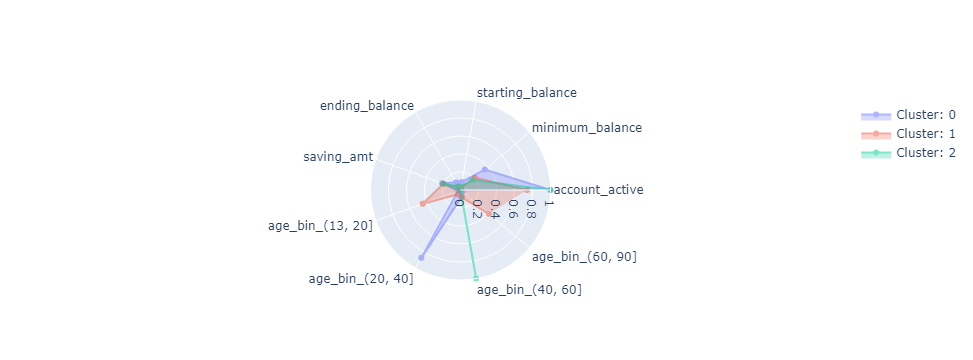

In [226]:
plot_radar(saving_radar)